In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.path as pth
import xarray as xr
import sys
import os

In [2]:
os.chdir('/g/data/e14/rmh561/croco/analysis/PAC12_75_cpl/OASIS_smooth_regridding/')

base = '/g/data/e14/rmh561/croco/'
base_data = base + 'archive/'
base_analysis = base + '/analysis/'
sys.path.append(base_analysis + 'PAC12_75_cpl/Processing_Scripts')

In [3]:
# Load custom scripts/tools:
import pac12_tools as ptools

In [4]:
# Test sst dataset:
sst = xr.open_dataset('/g/data/e14/rmh561/croco/archive/PAC12_75_cpl/PAC12_75_cpl_exp09/20151101_20151130/croco_out_day.nc').temp_surf.isel(time_counter=0)
sst = ptools.create_coords_CROCO(sst)

In [5]:
sst_smoothed = ptools.zlp_filt(sst,6.,half_filt=False)
sst_smoothed2 = ptools.zlp_filt(sst,6.)

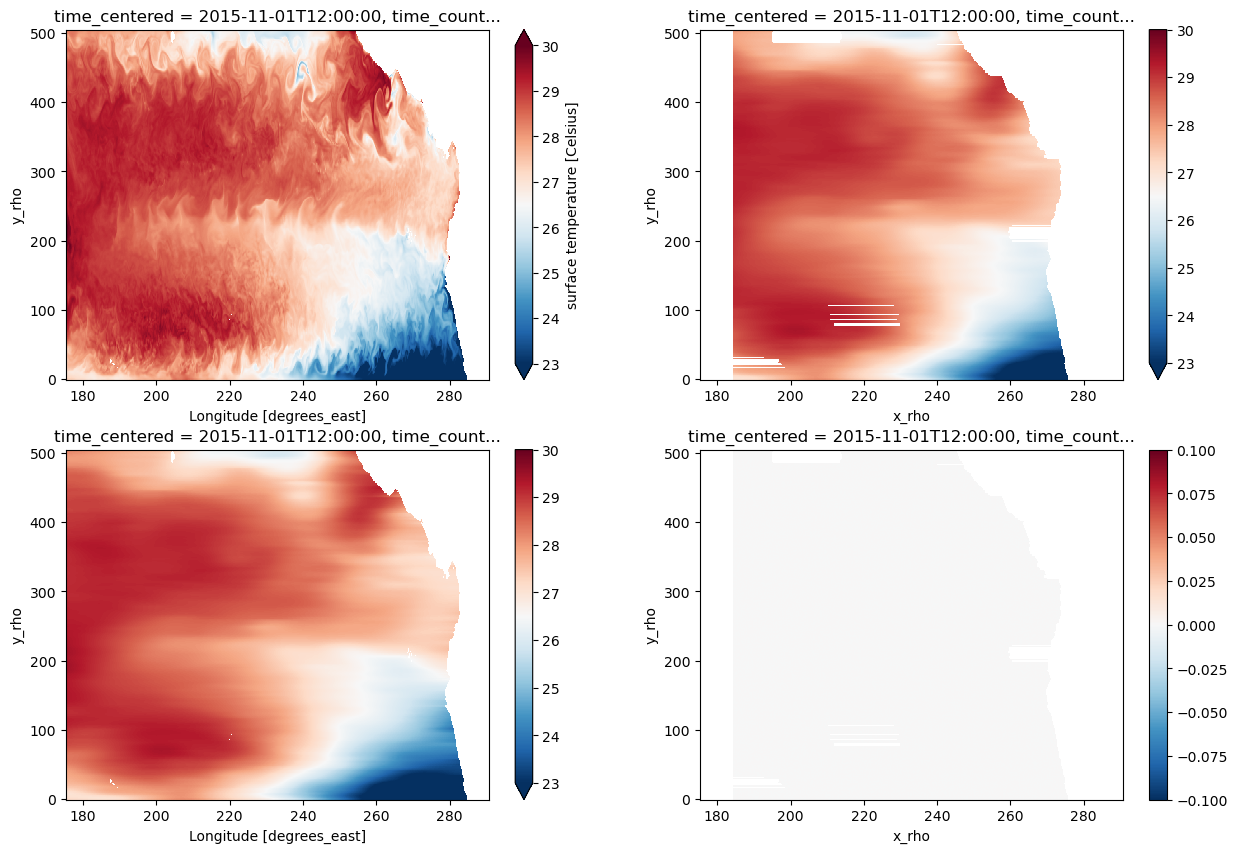

In [10]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
axs = axes.reshape(-1)
sst.plot(ax=axs[0],vmin=23.,vmax=30.,cmap='RdBu_r')
sst_smoothed.plot(ax=axs[1],vmin=23.,vmax=30.,cmap='RdBu_r')
sst_smoothed2.plot(ax=axs[2],vmin=23.,vmax=30.,cmap='RdBu_r')
(sst_smoothed-sst_smoothed2).plot(ax=axs[3],vmin=-.1,vmax=.1,cmap='RdBu_r')
